In [45]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.graph_objects as go

np.random.seed(1234)

In [46]:
# months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"]
months = np.arange(1, 7)
stars = np.arange(1,6)
genre = ["Drama", "Ação", "Terror"]
        #  "Comédia", "Romance"]

In [47]:
combinations = list(itertools.product(months, stars, genre))

df = pd.DataFrame(combinations, columns=["months", "stars", "genre"])

In [89]:
df["users"] =  np.random.uniform(5, 60, size=df.shape[0])
df["users"] = df["users"].apply(lambda x : round(x))

In [90]:
genre_color = {
  "Drama": "#ff8000",
  "Ação": "#00e054",
  "Terror": "#40bcf4"
}

In [104]:
import plotly.graph_objects as go
import numpy as np


# Inicializando o gráfico
fig = go.Figure()

# Posicionamento das barras
x = np.arange(len(df['months'].unique()))  # Garantindo que o eixo X seja numérico único
largura = 0.15  # Largura das barras (reduzida para mais barras no gráfico)

# Número total de valores únicos de 'stars'
num_stars = len(df["stars"].unique())

# Encontrando a posição de 'star = 3'
index_star_3 = np.where(df["stars"].unique() == 3)[0][0]

# Loop para cada valor único de 'stars'
total_users_per_month = np.zeros(len(x))
added_genres = set()

# Configurações para as barras

# Iterando pelas estrelas e gerando barras para cada gênero
for i, star in enumerate(df["stars"].unique()):
    df_filter = df[df["stars"] == star]  # Filtrando para a estrela atual
    bottom = np.zeros(len(x))  # Reinicializando o bottom para cada 'star'

    # Ajustando o deslocamento baseado no índice de 'star = 3'
    deslocamento = (i - index_star_3) * largura  # Alinha 'star = 3' no centro

    for genre in df_filter['genre'].unique():
        # Filtrando os usuários por gênero
        users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()

        # Garantindo o alinhamento correto do eixo X
        genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]

        # Adicionando o deslocamento à posição de cada barra
        genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        
        show_legend = genre not in added_genres
        added_genres.add(genre)

        # Plotando a barra empilhada para o gênero
        fig.add_trace(go.Bar(
            x=genre_x_com_deslocamento,  # Eixo X (categorias)
            y=users,  # Valores para cada categoria
            name=f'{genre}',  # Nome do gênero
            marker_color=genre_color[genre],  # Cor das barras
            width=largura,  # Largura das barras
            base=bottom[genre_x],  # Base de empilhamento
            hoverinfo='x+y+name',  # Informações de hover
            showlegend=show_legend, 
            # text=users,  # Anotações no topo da barra
            # textposition='outside',  # Posição do texto (fora da barra, no topo)
            # textfont=dict(size=50)
        ))

        # Atualizando o valor de 'bottom' para o próximo grupo
        bottom[genre_x] += users

        if genre == df_filter['genre'].unique()[-1]:
            for j, val in enumerate(users):
                fig.add_annotation(
                    x=genre_x_com_deslocamento[j],  # Posição X da anotação
                    y=bottom[genre_x[j]] + 8,  # Posição Y no topo da barra
                    text=f"{star}★",  # Texto (valor dos usuários)
                    showarrow=False,  # Sem seta
                    font=dict(size=18, color='#333333'),  # Tamanho da fonte
                    align='center'  # Centralizando o texto
                )


df_grouped = df.groupby("months").sum().reset_index() 
trend_line = go.Scatter(
    x=x, 
    y=df_grouped['users'], 
    mode='lines', 
    line=dict(color='red', dash='dash'),
    name="Linha de Tendência",
    showlegend=False
)
fig.add_trace(trend_line)

print(df_grouped.iloc[-1])

fig.add_annotation(
    x=df['months'].iloc[-1],  # Posição X (último mês)
    y=df_grouped['users'].iloc[-1],  # Posição Y (valor correspondente na linha de tendência)
    text="Total de usuários ativos no mês",  # Texto da anotação
    showarrow=False,  # Remover a seta
    font=dict(size=16, color="black"),  # Configuração da fonte
    align="center"  # Alinhar o texto ao centro
)


# Layout do gráfico
fig.update_layout(
    title='Classificação de Filmes por Gênero e Estrela',
    xaxis_title='Mês',
    yaxis_title='Usuários',
    barmode='stack',  # Empilhamento das barras
    xaxis={'tickmode': 'array', 'tickvals': x, 'ticktext': ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"]},
    legend_title='Gêneros de Filmes',
    # legend=dict(
    #     title='Gêneros de Filmes',  # Título específico da legenda
    #     orientation='h',  # Definindo a legenda horizontal
    #     x=0.5,  # Posicionando a legenda
    #     xanchor='center',  # Centralizando a legenda
    #     y=-0.2,  # Ajustando a posição vertical da legenda
    #     yanchor='top'  # Alinhando ao topo
    # )
)

fig.update_layout(
    height=800  # Altura do gráfico em pixels (ajuste conforme necessário)
)

# Exibindo o gráfico
fig.show()


months                                                    6
stars                                                    45
genre     DramaAçãoTerrorDramaAçãoTerrorDramaAçãoTerrorD...
users                                                   465
Name: 5, dtype: object


In [ ]:
# 
# plt.figure(figsize=(25, 15))
fig = go.Figure()

# Posicionamento das barras
x = np.arange(len(df['months'].unique()))  # Garantindo que o eixo X seja numérico único
largura = 0.15  # Largura das barras (reduzida para mais barras no gráfico)

# Número total de valores únicos de 'stars'
num_stars = len(df["stars"].unique())

# Encontrando a posição de 'star = 3'
index_star_3 = np.where(df["stars"].unique() == 3)[0][0]

# Loop para cada valor único de 'stars'
total_users_per_month = np.zeros(len(x))

# descoc_inter = 0
handles = []
labels = []

for i, star in enumerate(df["stars"].unique()):
    df_filter = df[df["stars"] == star]  # Filtrando para a estrela atual
    bottom = np.zeros(len(x))  # Reinicializando o bottom para cada 'star'

    # Ajustando o deslocamento baseado no índice de 'star = 3'
    deslocamento = (i - index_star_3) * largura  # Alinha 'star = 3' no centro
    

    for genre in df_filter['genre'].unique():
        # Filtrando os usuários por gênero
        users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()
        
        # Garantindo o alinhamento correto do eixo X
        genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]
        # genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]

        # Adicionando o deslocamento à posição de cada barra
        # genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        # Plotando a barra empilhada para o gênero
        # bars = 

        print(genre_x_com_deslocamento)
        bars = fig.add_trace(go.Bar(
            x=genre_x_com_deslocamento,  # Eixo X (categorias)
            y=users,  # Valores para cada categoria
            name=f'{genre}',  # Nome do gênero
            marker_color=genre_color[genre],  # Cor das barras
            width=largura,  # Largura das barras
            base=bottom[genre_x],
            # base=deslocamento,  # Deslocamento (começo da barra)
            hoverinfo='x+y+name',  # Informações de hover
        ))


        # Atualizando o valor de 'bottom' para o próximo grupo
        bottom[genre_x] += users

        total_users_per_month[genre_x] += users

        # # # Adicionando o handle e label para o gênero apenas na primeira ocorrência
        # if i == 0:  # Só adicionar à legenda na primeira estrela
        #     print(bars)
        #     handles.append(bars[0])  # Selecionando a primeira barra (para o gênero)
        #     labels.append(genre)
        
        if genre == df_filter['genre'].unique()[-1]:

            for j, bar in enumerate(bars):
                pass
                # plt.text(
                #         bar.get_x() + bar.get_width() / 2,  # Posição X (meio da barra)
                #         bar.get_y() + users.iloc[j],  # Posição Y (no topo da barra)
                #         f"{star}★",  # Texto da anotação
                #         ha='center',  # Alinha o texto ao centro
                #         va='bottom',  # Coloca o texto acima da barra
                #         fontsize=20,  # Tamanho da fonte
                #         color='black'  # Cor do texto
                #     )


# plt.xticks(x, ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"], fontsize=20)
# # plt.xticks(x, df['months'].unique(), fontsize=20)
# plt.xlabel("Mês", fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel("Usuários", fontsize=20)

# # Adicionando legenda
# plt.legend(handles=handles, labels=labels, title="Gêneros", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

# df_grouped = df.groupby("months").sum().reset_index()

# plt.plot(x, df_grouped['users'], color='red', linestyle='--', label="Linha de Tendência")

# # print(df_grouped[df_grouped["months"] == "Junho"]['users'].values[0])

# plt.text(
#     x[-1] + 0.2, 
#     df_grouped[df_grouped["months"] == 6]['users'].values[0], 
#     'Total de usuários\n ativos no mês', fontsize=20, ha='center', color='black'
# )

# # plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)

# plt.title("Classificação de filmes por gênero por mês e usuários totais", fontsize=24)

# # Exibindo o gráfico
# plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição de legendas
# plt.show()
fig.show()



[np.float64(-0.3), np.float64(0.7), np.float64(1.7), np.float64(2.7), np.float64(3.7), np.float64(4.7)]
[np.float64(-0.3), np.float64(0.7), np.float64(1.7), np.float64(2.7), np.float64(3.7), np.float64(4.7)]
[np.float64(-0.3), np.float64(0.7), np.float64(1.7), np.float64(2.7), np.float64(3.7), np.float64(4.7)]
[np.float64(-0.15), np.float64(0.85), np.float64(1.85), np.float64(2.85), np.float64(3.85), np.float64(4.85)]
[np.float64(-0.15), np.float64(0.85), np.float64(1.85), np.float64(2.85), np.float64(3.85), np.float64(4.85)]
[np.float64(-0.15), np.float64(0.85), np.float64(1.85), np.float64(2.85), np.float64(3.85), np.float64(4.85)]
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]
[np.float64(0.15), np.float64(1.15), np.float64(2

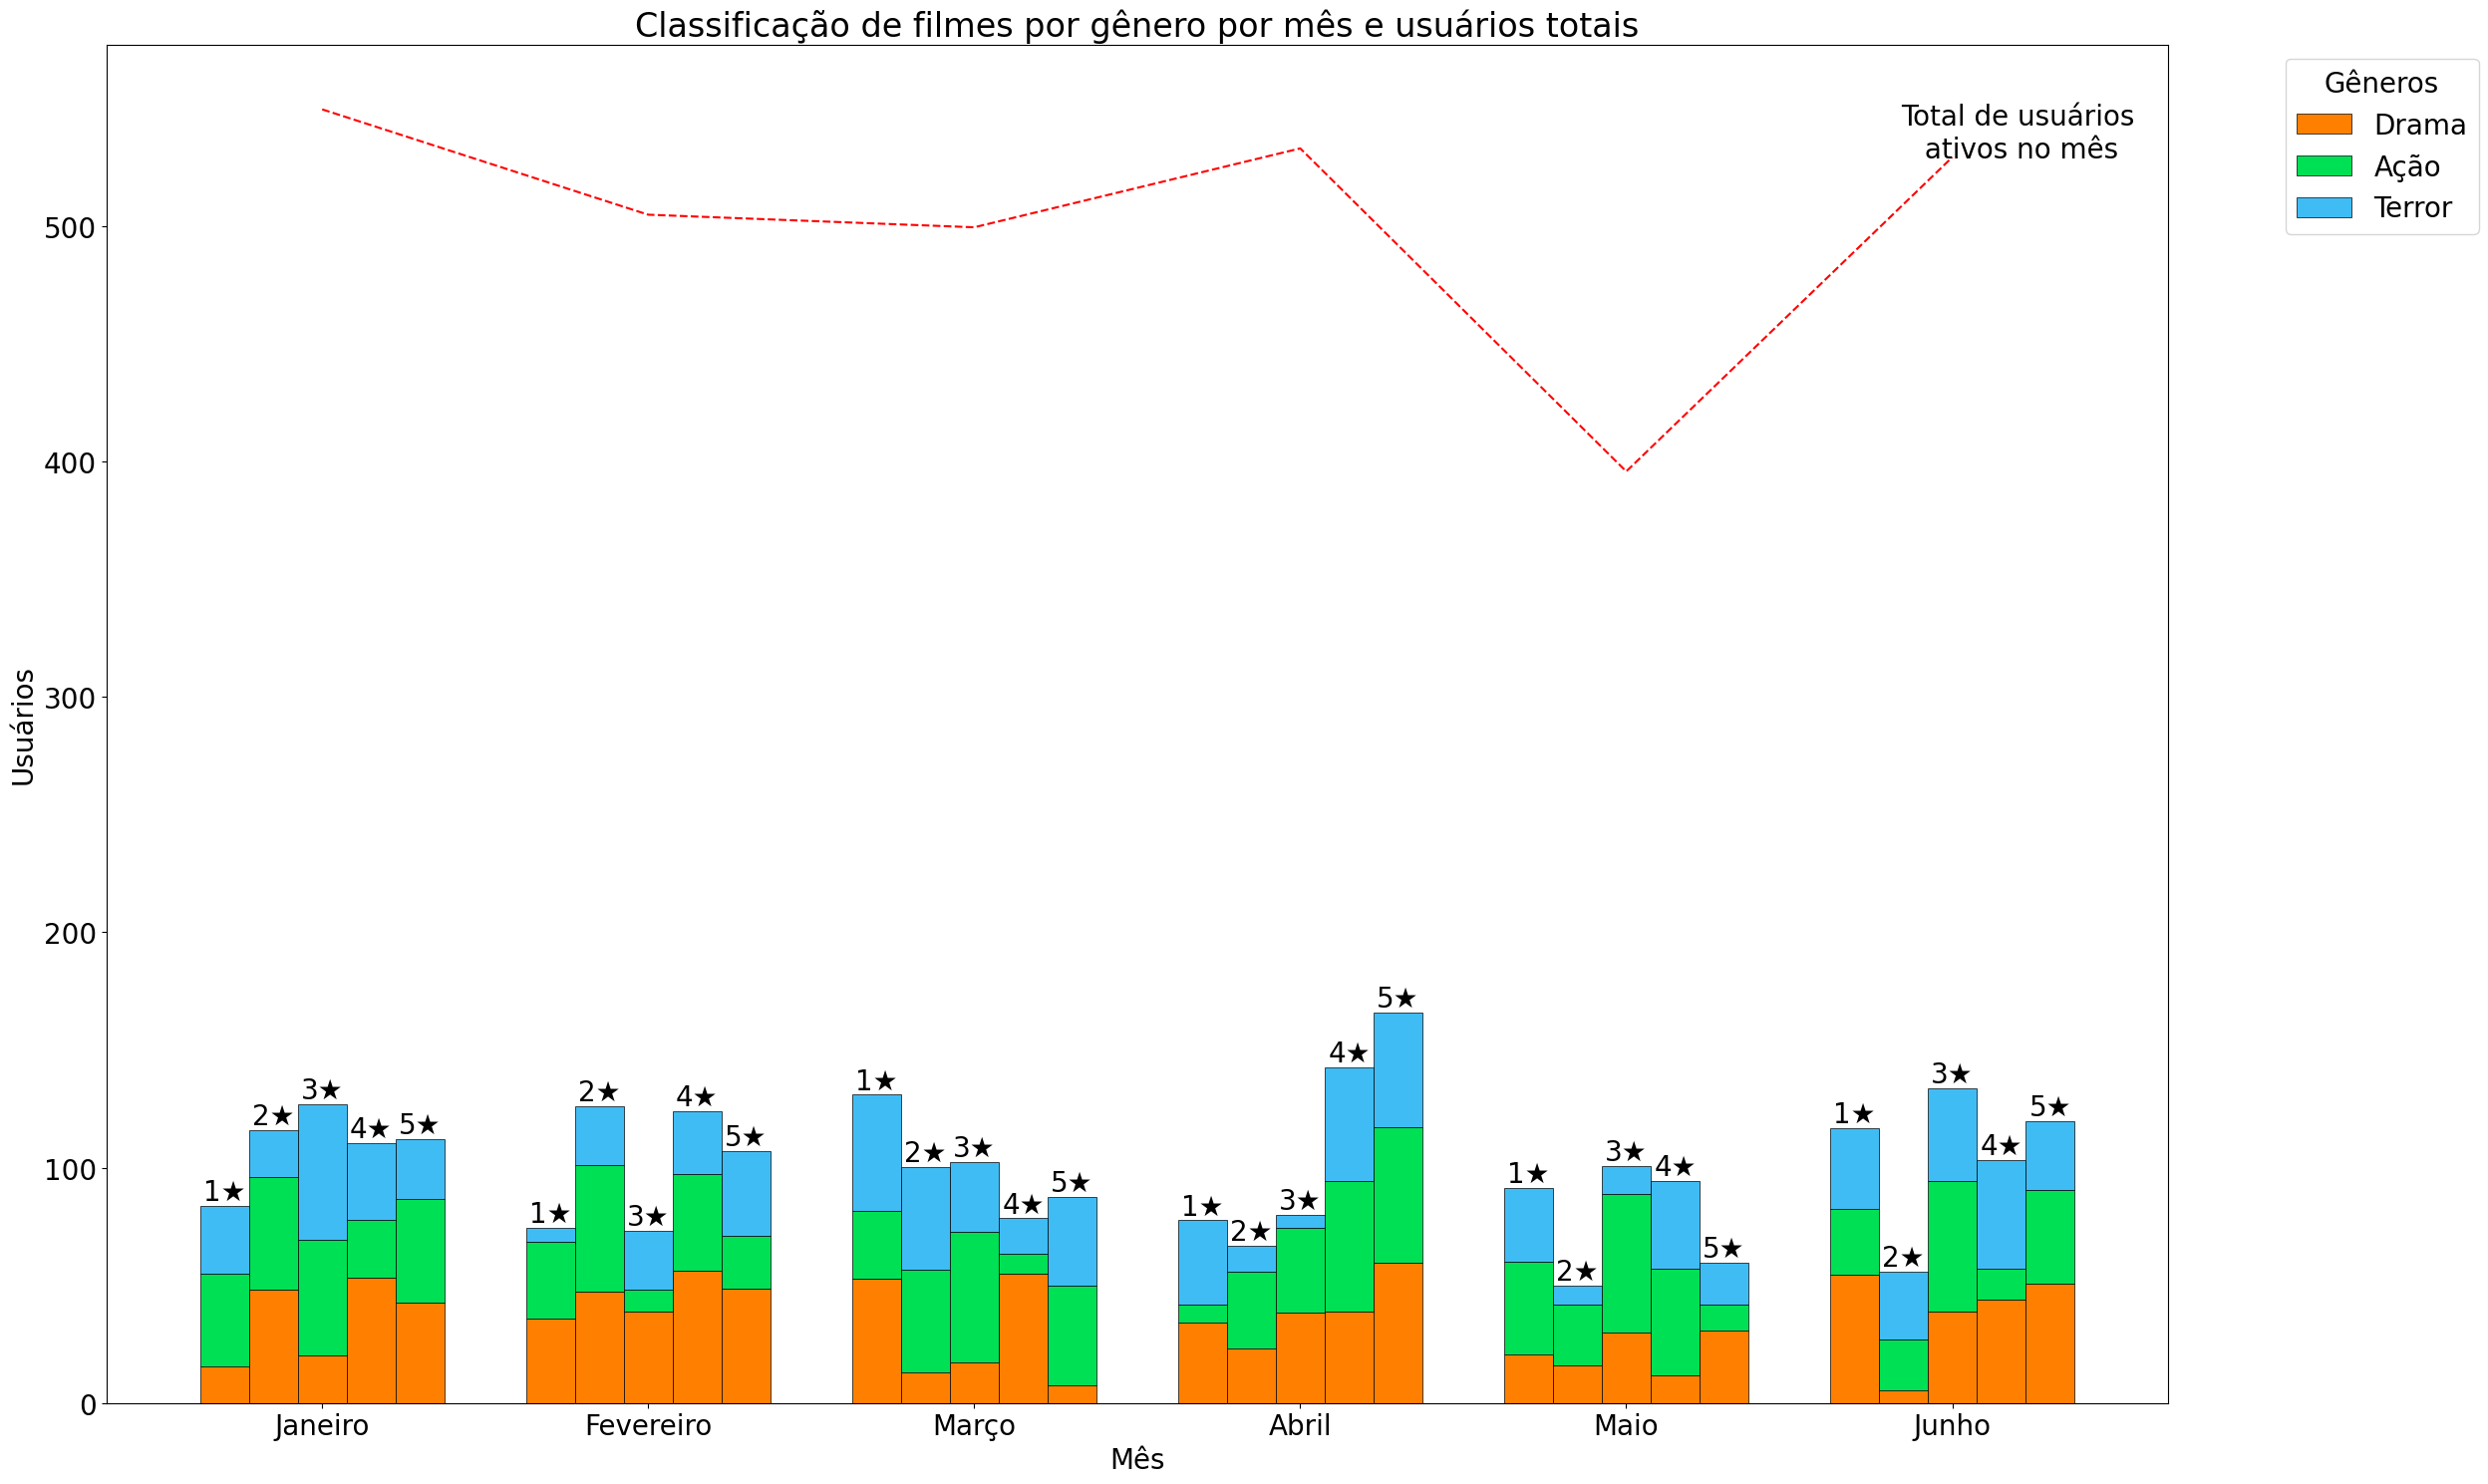

In [ ]:
plt.figure(figsize=(25, 15))


# Posicionamento das barras
x = np.arange(len(df['months'].unique()))  # Garantindo que o eixo X seja numérico único
largura = 0.15  # Largura das barras (reduzida para mais barras no gráfico)

# Número total de valores únicos de 'stars'
num_stars = len(df["stars"].unique())

# Encontrando a posição de 'star = 3'
index_star_3 = np.where(df["stars"].unique() == 3)[0][0]

# Loop para cada valor único de 'stars'
total_users_per_month = np.zeros(len(x))

descoc_inter = 0
handles = []
labels = []

for i, star in enumerate(df["stars"].unique()):
    df_filter = df[df["stars"] == star]  # Filtrando para a estrela atual
    bottom = np.zeros(len(x))  # Reinicializando o bottom para cada 'star'

    # Ajustando o deslocamento baseado no índice de 'star = 3'
    deslocamento = (i - index_star_3) * largura  # Alinha 'star = 3' no centro

    for genre in df_filter['genre'].unique():
        # Filtrando os usuários por gênero
        users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()
        
        # Garantindo o alinhamento correto do eixo X
        genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]

        # Adicionando o deslocamento à posição de cada barra
        genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        # Plotando a barra empilhada para o gênero
        bars = plt.bar(genre_x_com_deslocamento, users, bottom=bottom[genre_x], width=largura, label=f'{genre}', color=genre_color[genre], edgecolor='black', linewidth=0.5)
        # Atualizando o valor de 'bottom' para o próximo grupo
        bottom[genre_x] += users

        total_users_per_month[genre_x] += users

        # Adicionando o handle e label para o gênero apenas na primeira ocorrência
        if i == 0:  # Só adicionar à legenda na primeira estrela
            handles.append(bars[0])  # Selecionando a primeira barra (para o gênero)
            labels.append(genre)
        
        if genre == df_filter['genre'].unique()[-1]:

            for j, bar in enumerate(bars):

                plt.text(
                        bar.get_x() + bar.get_width() / 2,  # Posição X (meio da barra)
                        bar.get_y() + users.iloc[j],  # Posição Y (no topo da barra)
                        f"{star}★",  # Texto da anotação
                        ha='center',  # Alinha o texto ao centro
                        va='bottom',  # Coloca o texto acima da barra
                        fontsize=20,  # Tamanho da fonte
                        color='black'  # Cor do texto
                    )


plt.xticks(x, ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho"], fontsize=20)
# plt.xticks(x, df['months'].unique(), fontsize=20)
plt.xlabel("Mês", fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Usuários", fontsize=20)

# Adicionando legenda
plt.legend(handles=handles, labels=labels, title="Gêneros", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=20)

df_grouped = df.groupby("months").sum().reset_index()

plt.plot(x, df_grouped['users'], color='red', linestyle='--', label="Linha de Tendência")

# print(df_grouped[df_grouped["months"] == "Junho"]['users'].values[0])

plt.text(
    x[-1] + 0.2, 
    df_grouped[df_grouped["months"] == 6]['users'].values[0], 
    'Total de usuários\n ativos no mês', fontsize=20, ha='center', color='black'
)

# plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5)

plt.title("Classificação de filmes por gênero por mês e usuários totais", fontsize=24)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição de legendas
plt.show()


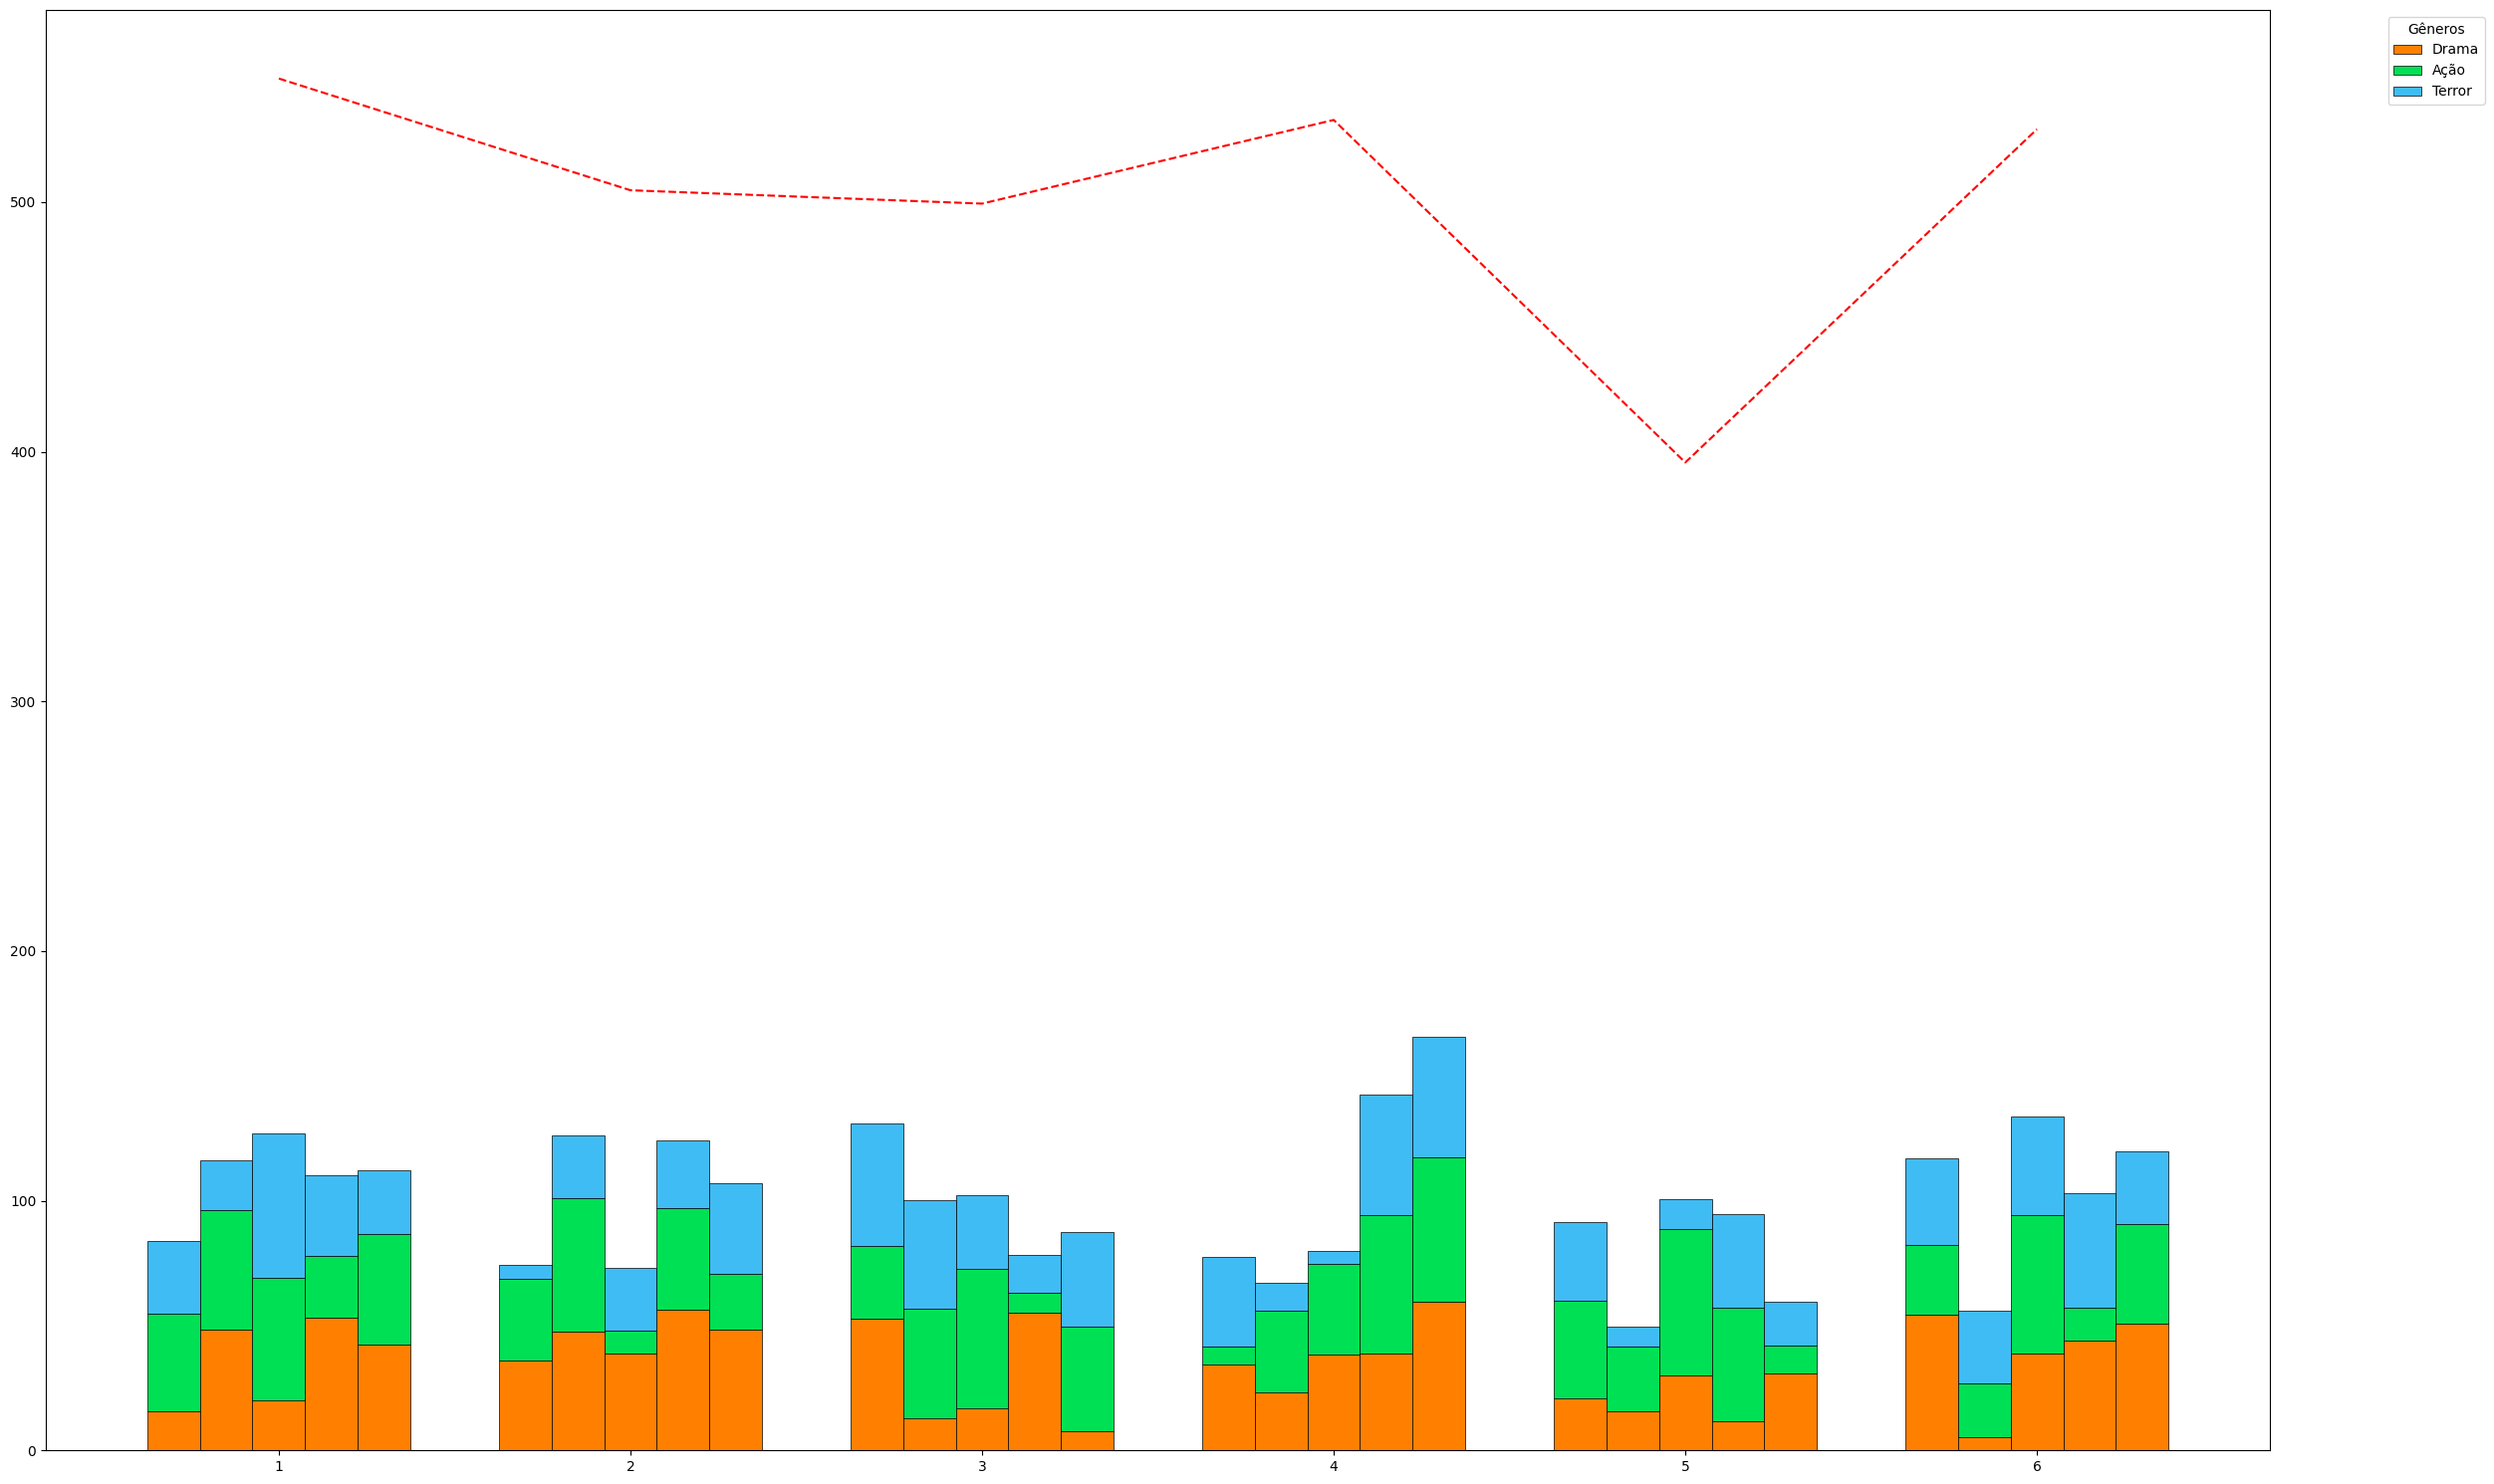

In [7]:
plt.figure(figsize=(25, 15))

# Posicionamento das barras
x = np.arange(len(df['months'].unique()))  # Garantindo que o eixo X seja numérico único
largura = 0.15  # Largura das barras (reduzida para mais barras no gráfico)

# Número total de valores únicos de 'stars'
num_stars = len(df["stars"].unique())

# Encontrando a posição de 'star = 3'
index_star_3 = np.where(df["stars"].unique() == 3)[0][0]

# Loop para cada valor único de 'stars'
total_users_per_month = np.zeros(len(x))

descoc_inter = 0
handles = []
labels = []

for i, star in enumerate(df["stars"].unique()):
    df_filter = df[df["stars"] == star]  # Filtrando para a estrela atual
    bottom = np.zeros(len(x))  # Reinicializando o bottom para cada 'star'

    # Ajustando o deslocamento baseado no índice de 'star = 3'
    deslocamento = (i - index_star_3) * largura  # Alinha 'star = 3' no centro

    for genre in df_filter['genre'].unique():
        # Filtrando os usuários por gênero
        users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()
        
        # Garantindo o alinhamento correto do eixo X
        genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]

        # Adicionando o deslocamento à posição de cada barra
        genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        
        # Plotando a barra empilhada para o gênero
        bars = plt.bar(genre_x_com_deslocamento, users, bottom=bottom[genre_x], width=largura, label=f'{genre}', color=genre_color[genre], edgecolor='black', linewidth=0.5)
        
        # Atualizando o valor de 'bottom' para o próximo grupo
        bottom[genre_x] += users

        total_users_per_month[genre_x] += users

        # Adicionando o handle e label para o gênero apenas na primeira ocorrência
        if i == 0:  # Só adicionar à legenda na primeira estrela
            handles.append(bars[0])  # Selecionando a primeira barra (para o gênero)
            labels.append(genre)


plt.xticks(x, df['months'].unique())

# Adicionando legenda
plt.legend(handles=handles, labels=labels, title="Gêneros", bbox_to_anchor=(1.05, 1), loc='upper left')

df_grouped = df.groupby("months").sum().reset_index()

plt.plot(x, df_grouped['users'], color='red', linestyle='--', label="Linha de Tendência")

# Exibindo o gráfico
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição de legendas
plt.show()


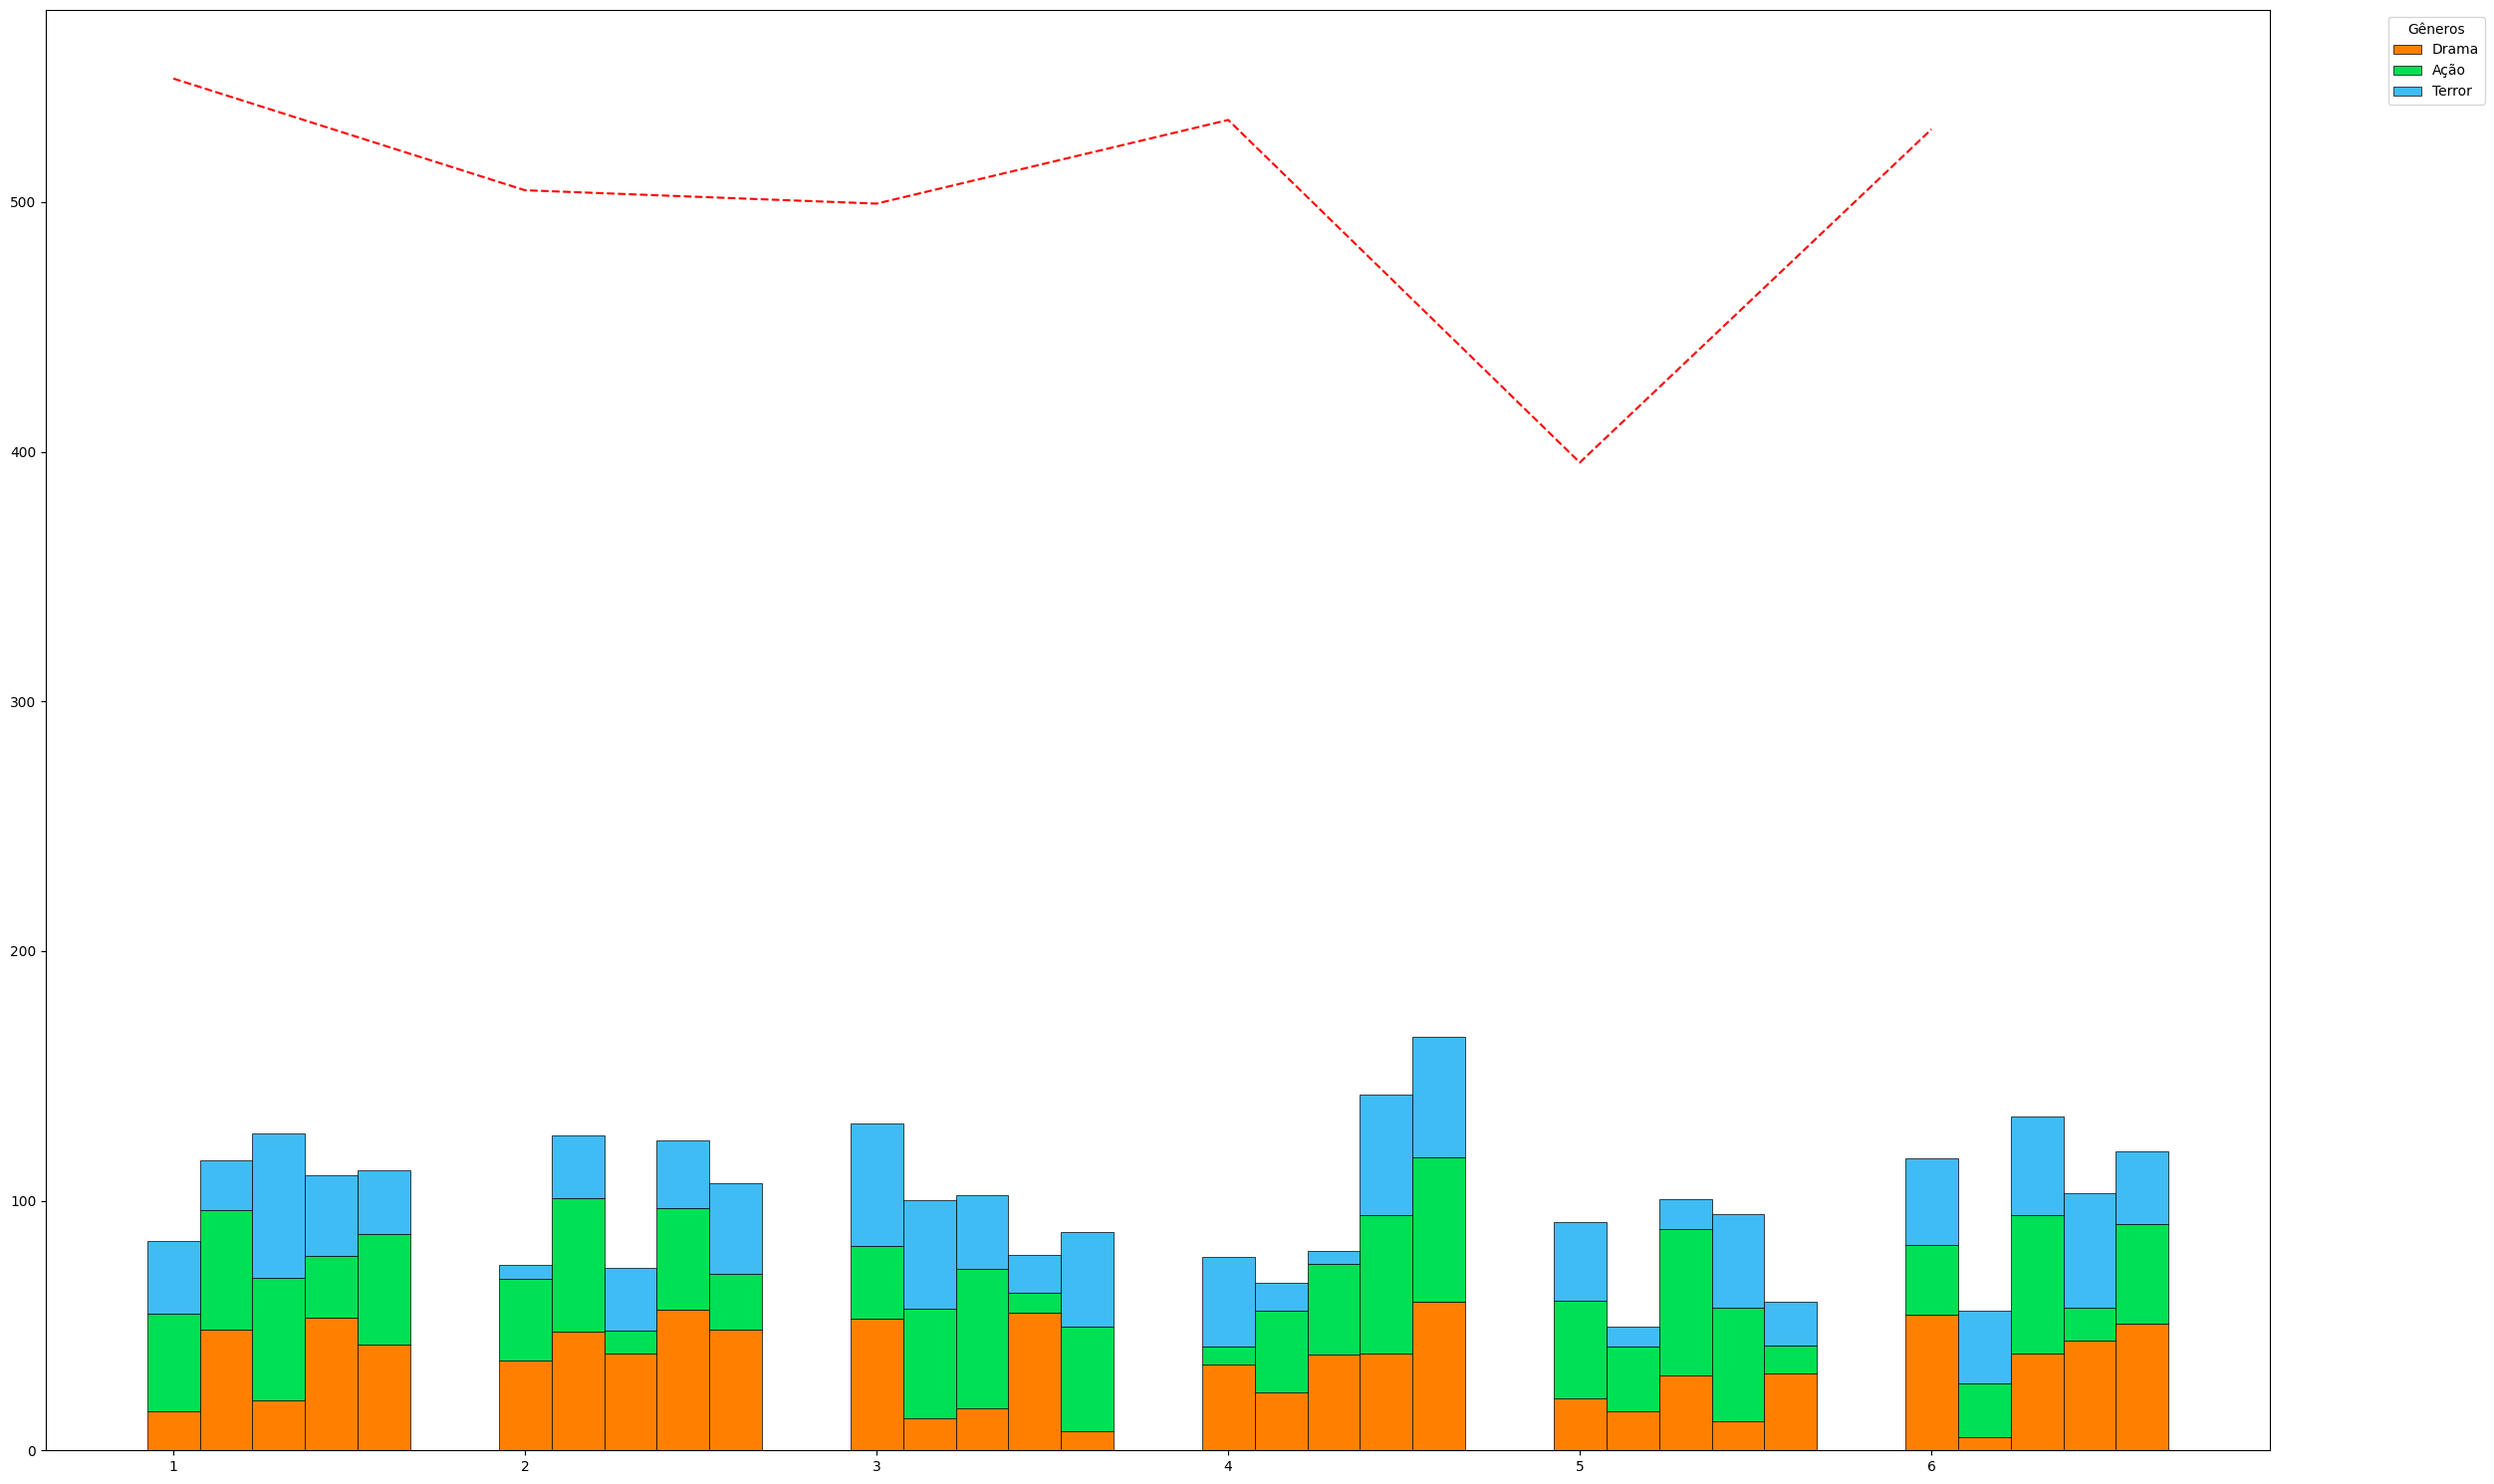

In [8]:
plt.figure(figsize=(25, 15))

# Posicionamento das barras
x = np.arange(len(df['months'].unique()))  # Garantindo que o eixo X seja numérico único
largura = 0.15 # Largura das barras (reduzida para mais barras no gráfico)

# Número total de valores únicos de 'stars'
num_stars = len(df["stars"].unique())

# Loop para cada valor único de 'stars'

total_users_per_month = np.zeros(len(x))

descoc_inter = 0
handles = []
labels = []

for i, star in enumerate(df["stars"].unique()):
    df_filter = df[df["stars"] == star]  # Filtrando para a estrela atual
    bottom = np.zeros(len(x))  # Reinicializando o bottom para cada 'star'

    # Cálculo do deslocamento para agrupar as barras de 'stars' com espaçamento adequado
    # deslocamento = (largura * 1.5) * (i - (num_stars - 1) / 2)  + descoc_inter # Garantindo separação entre os 'stars'
    # deslocamento = (largura + 0.05) * (i - (num_stars - 1) / 2)
    deslocamento = i * largura + descoc_inter

    for genre in df_filter['genre'].unique():
        # Filtrando os usuários por gênero
        users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()
        
        # Garantindo o alinhamento correto do eixo X
        genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]

        # Adicionando o deslocamento à posição de cada barra
        genre_x_com_deslocamento = [x_val + deslocamento for x_val in genre_x]
        # Plotando a barra empilhada para o gênero
        bars = plt.bar(genre_x_com_deslocamento , users, bottom=bottom[genre_x], width=largura, label=f'{genre}', color=genre_color[genre], edgecolor='black', linewidth=0.5)
        
        # Atualizando o valor de 'bottom' para o próximo grupo
        bottom[genre_x] += users

        total_users_per_month[genre_x] += users

         # Adicionando o handle e label para o gênero apenas na primeira ocorrência
        if i == 0:  # Só adicionar à legenda na primeira estrela
            handles.append(bars[0])  # Selecionando a primeira barra (para o gênero)
            labels.append(genre)

    # descoc_inter += 1
plt.xticks(x, df['months'].unique())

# Adicionando legenda
plt.legend(handles=handles, labels=labels, title="Gêneros", bbox_to_anchor=(1.05, 1), loc='upper left')


df_grouped = df.groupby("months").sum().reset_index()


plt.plot(x, df_grouped['users'], color='red', linestyle='--', label="Linha de Tendência")

# Exibindo o gráfico
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição de legendas
plt.show()

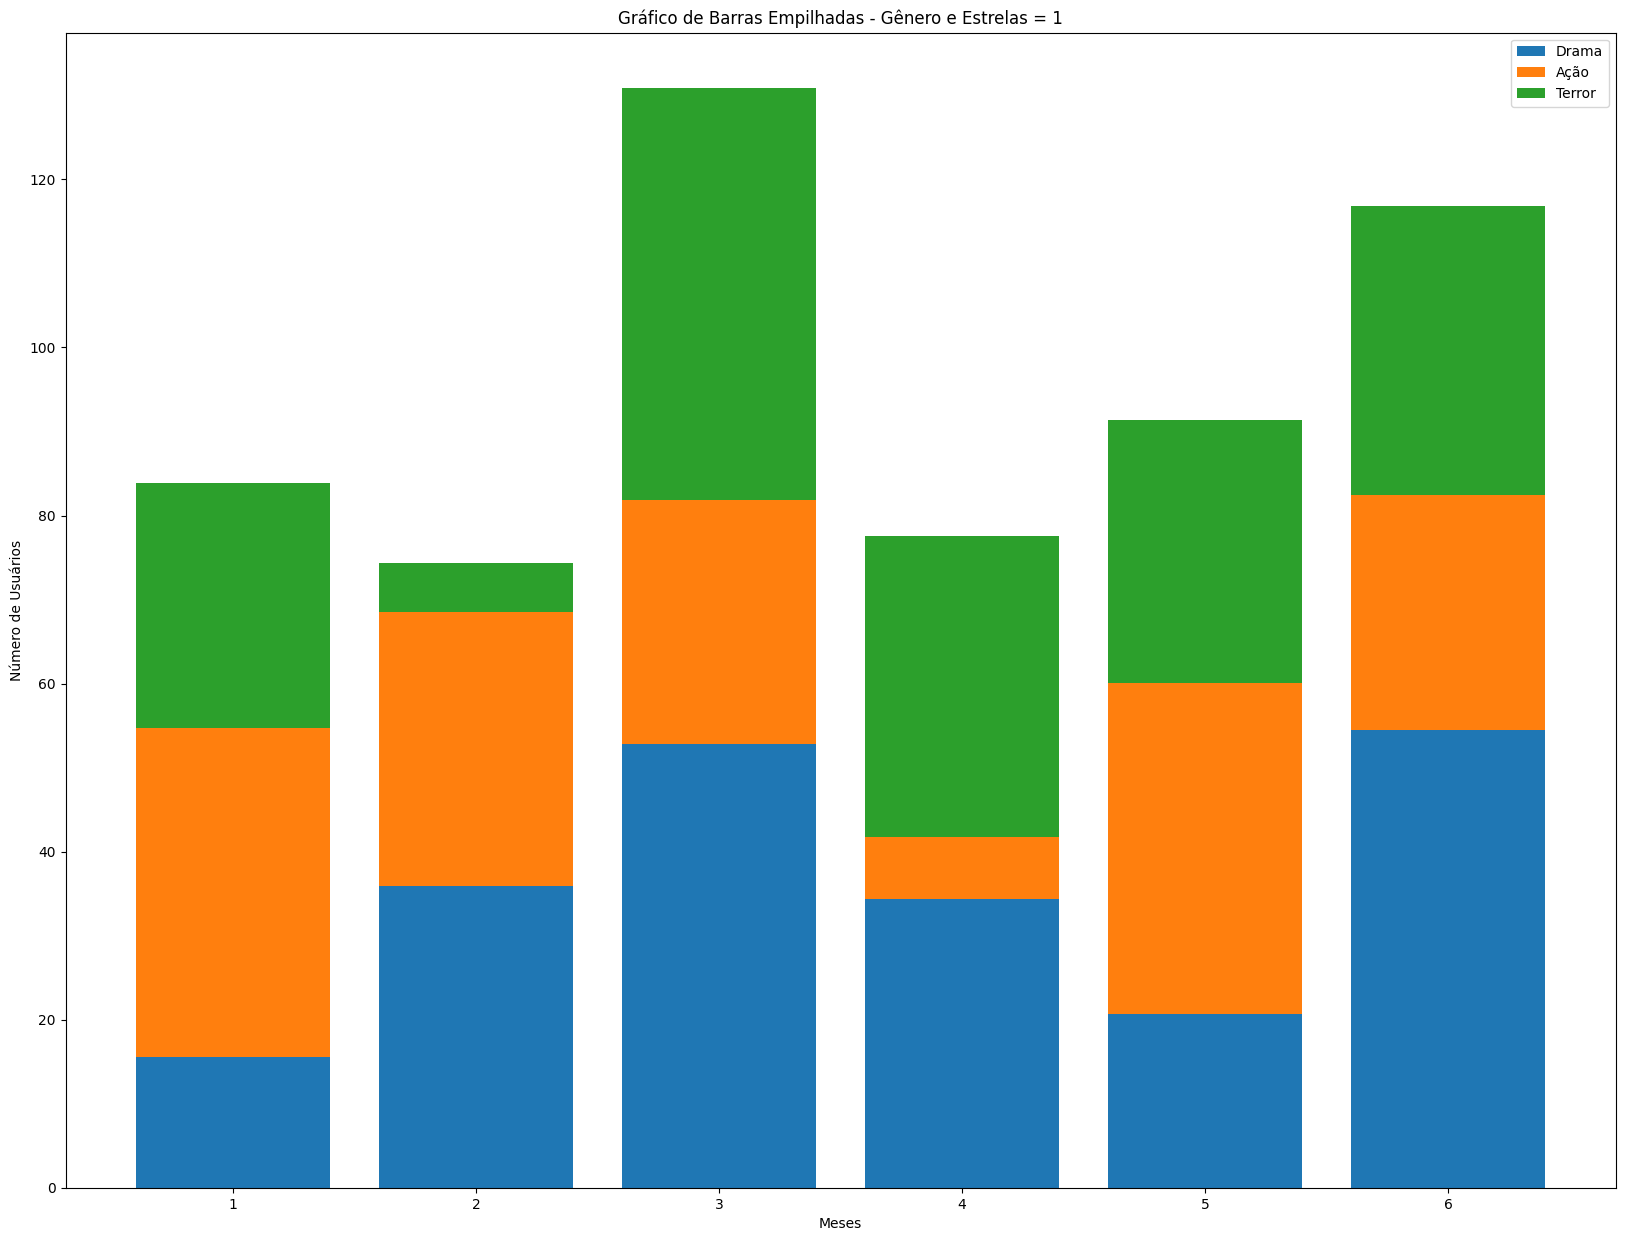

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 15))

# Filtrando o DataFrame para estrelas = 1
df_filter = df[df["stars"] == 1]

# Posicionamento das barras
x = np.arange(len(df_filter['months'].unique()))  # Garantindo que o eixo X seja numérico único

# Inicializando a variável para o valor base (primeiro grupo)
bottom = np.zeros(len(x))

# Criando as barras empilhadas
for genre in df_filter['genre'].unique():  
    # Filtrando os usuários por gênero
    users = df_filter[df_filter['genre'] == genre].groupby('months')['users'].sum()
    
    # Garantindo o alinhamento correto do eixo X
    genre_x = [list(df_filter['months'].unique()).index(month) for month in users.index]

    # Plotando a barra empilhada para o gênero
    plt.bar(genre_x, users, bottom=bottom[genre_x], label=genre)
    
    # Atualizando o valor de 'bottom' para o próximo grupo
    bottom[genre_x] += users

# Adicionando título e labels
plt.xlabel('Meses')
plt.ylabel('Número de Usuários')
plt.title('Gráfico de Barras Empilhadas - Gênero e Estrelas = 1')
plt.xticks(x, df_filter['months'].unique())  # Colocando os meses como labels do eixo X

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()
